### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


1. Análise do faturamento


Facturación total por tienda:
Tienda
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58
Name: Preço, dtype: float64

Facturación total de todas las tiendas: 5871490.79


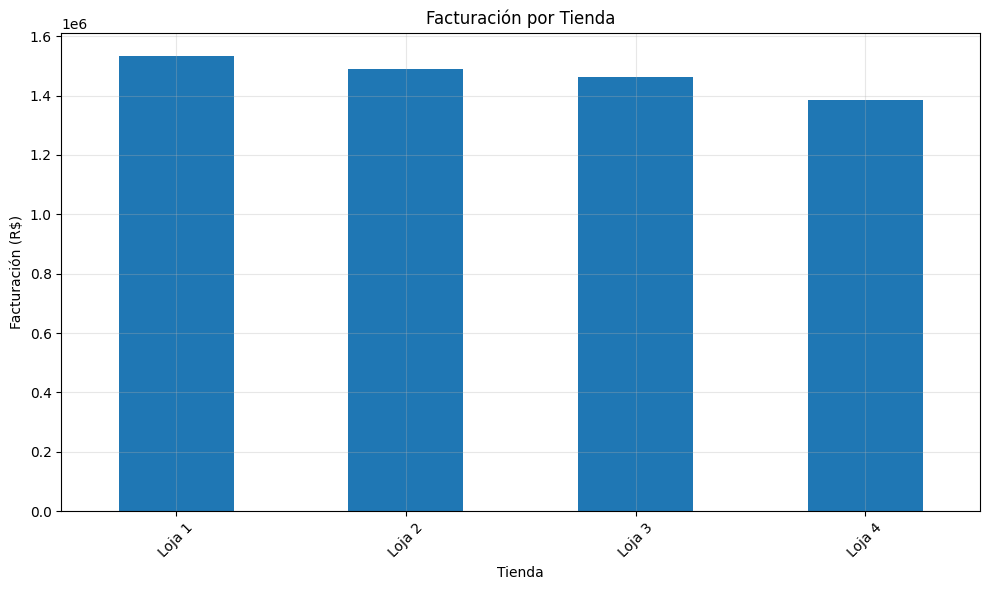


Estadísticas descriptivas de precios por tienda:
         count    mean     std    min    25%     50%     75%      max
Tienda                                                               
Loja 1  2359.0  650.49  819.58  10.07  74.34  313.75  904.13  3969.38
Loja 2  2359.0  630.97  794.08  10.16  72.73  290.96  903.58  3937.85
Loja 3  2359.0  620.61  774.19  10.08  76.56  301.67  888.04  3957.62
Loja 4  2358.0  587.15  758.34  10.17  71.22  279.32  845.58  3869.56

Facturación mensual por tienda:
Tienda     Loja 1    Loja 2    Loja 3    Loja 4
Mes                                            
2020-01  44112.70  41505.53  31710.54  25731.91
2020-02  53405.54  23184.97  36769.81  30507.49
2020-03  42083.02  40687.92  40033.19  38044.35
2020-04  44888.34  36862.31  47124.45  52656.70
2020-05  51443.80  33949.42  34831.23  42654.91
2020-06  35062.24  34741.62  23285.27  35804.36
2020-07  46780.66  31396.39  44803.33  35899.68
2020-08  41501.80  31297.17  34500.91  41609.71
2020-09  40324.79

<Figure size 1200x600 with 0 Axes>

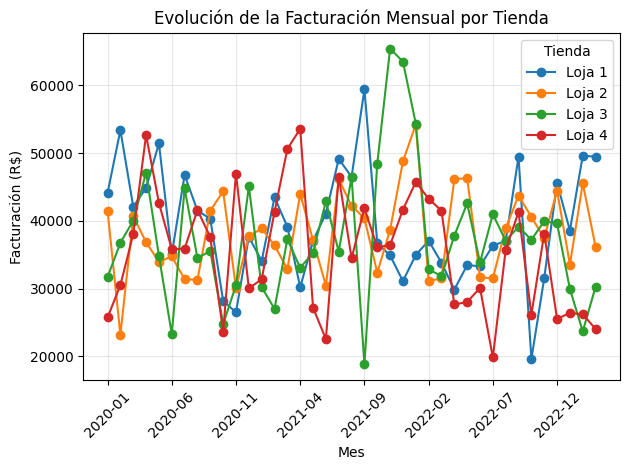

In [2]:
## Calculando la facturación total por tienda (precio * cantidad)
## Primero concatenaremos todas las tiendas en un solo DataFrame para facilitar el análisis

# Agregando una columna para identificar cada tienda
loja['Tienda'] = 'Loja 1'
loja2['Tienda'] = 'Loja 2'
loja3['Tienda'] = 'Loja 3'
loja4['Tienda'] = 'Loja 4'

# Concatenando todos los DataFrames
todas_lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Calculando la facturación total por tienda
facturacion_por_tienda = todas_lojas.groupby('Tienda')['Preço'].sum().round(2)

print("Facturación total por tienda:")
print(facturacion_por_tienda)
print("\nFacturación total de todas las tiendas:", facturacion_por_tienda.sum().round(2))

# Visualización gráfica
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
facturacion_por_tienda.plot(kind='bar')
plt.title('Facturación por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Facturación (R$)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculando estadísticas descriptivas de la facturación
print("\nEstadísticas descriptivas de precios por tienda:")
print(todas_lojas.groupby('Tienda')['Preço'].describe().round(2))

# Análisis mensual
todas_lojas['Data da Compra'] = pd.to_datetime(todas_lojas['Data da Compra'])
todas_lojas['Mes'] = todas_lojas['Data da Compra'].dt.strftime('%Y-%m')

facturacion_mensual = todas_lojas.groupby(['Mes', 'Tienda'])['Preço'].sum().unstack()
print("\nFacturación mensual por tienda:")
print(facturacion_mensual.round(2))

# Visualización de la evolución mensual
plt.figure(figsize=(12, 6))
facturacion_mensual.plot(marker='o')
plt.title('Evolución de la Facturación Mensual por Tienda')
plt.xlabel('Mes')
plt.ylabel('Facturación (R$)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

## Ventas totales por cada tienda en la semana

Día de la semana con mayores ventas por tienda:

Ventas máximas por día de la semana:
Tienda Dia_Semana_Nombre     Preço
Loja 1          Thursday 244956.44
Loja 2          Saturday 235665.08
Loja 3          Thursday 225191.09
Loja 4            Sunday 222915.55


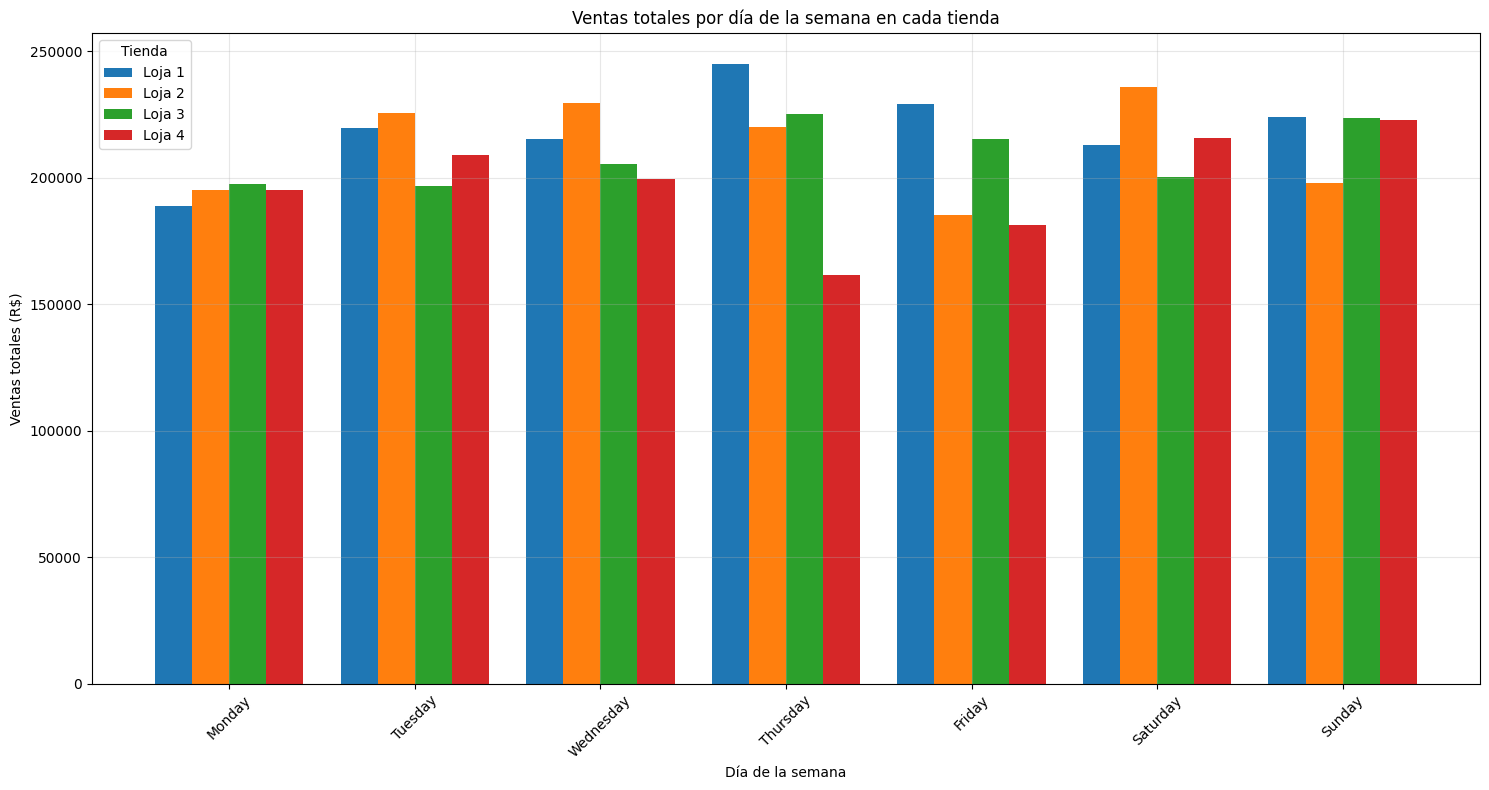


Distribución porcentual de ventas por día de la semana en cada tienda:

Loja 1:
Monday: 12.3%
Tuesday: 14.3%
Wednesday: 14.03%
Thursday: 15.96%
Friday: 14.93%
Saturday: 13.87%
Sunday: 14.61%

Loja 2:
Monday: 13.11%
Tuesday: 15.16%
Wednesday: 15.41%
Thursday: 14.77%
Friday: 12.43%
Saturday: 15.83%
Sunday: 13.29%

Loja 3:
Monday: 13.49%
Tuesday: 13.45%
Wednesday: 14.03%
Thursday: 15.38%
Friday: 14.72%
Saturday: 13.67%
Sunday: 15.26%

Loja 4:
Monday: 14.1%
Tuesday: 15.09%
Wednesday: 14.4%
Thursday: 11.65%
Friday: 13.08%
Saturday: 15.57%
Sunday: 16.1%


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Añadimos la importación de numpy

# Obtenemos el día de la semana (0 = Lunes, 6 = Domingo)
todas_lojas['Dia_Semana'] = todas_lojas['Data da Compra'].dt.dayofweek
todas_lojas['Dia_Semana_Nombre'] = todas_lojas['Data da Compra'].dt.day_name()
todas_lojas['Mes-Ano'] = todas_lojas['Data da Compra'].dt.strftime('%Y-%m')

# Agrupamos por mes, tienda y día de la semana, y sumamos las ventas
ventas_por_dia_semana = todas_lojas.groupby(['Tienda', 'Dia_Semana', 'Dia_Semana_Nombre'])['Preço'].sum().reset_index()

# Encontramos el día de la semana con más ventas para cada tienda
dias_max_ventas = ventas_por_dia_semana.loc[ventas_por_dia_semana.groupby('Tienda')['Preço'].idxmax()]

# Mostramos los resultados
print("Día de la semana con mayores ventas por tienda:")
print("\nVentas máximas por día de la semana:")
print(dias_max_ventas[['Tienda', 'Dia_Semana_Nombre', 'Preço']].to_string(index=False))

# Visualización gráfica de ventas totales por día de la semana para cada tienda
plt.figure(figsize=(15, 8))

# Creamos un gráfico de barras agrupadas
dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tiendas = todas_lojas['Tienda'].unique()
x = np.arange(len(dias_semana))
width = 0.2
multiplier = 0

for tienda in tiendas:
    datos_tienda = ventas_por_dia_semana[ventas_por_dia_semana['Tienda'] == tienda]
    ventas_ordenadas = [datos_tienda[datos_tienda['Dia_Semana_Nombre'] == dia]['Preço'].values[0] for dia in dias_semana]
    offset = width * multiplier
    plt.bar(x + offset, ventas_ordenadas, width, label=tienda)
    multiplier += 1

plt.title('Ventas totales por día de la semana en cada tienda')
plt.xlabel('Día de la semana')
plt.ylabel('Ventas totales (R$)')
plt.xticks(x + width * 1.5, dias_semana, rotation=45)
plt.legend(title='Tienda')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Análisis adicional: Distribución porcentual de ventas por día de la semana
print("\nDistribución porcentual de ventas por día de la semana en cada tienda:")
for tienda in tiendas:
    ventas_tienda = ventas_por_dia_semana[ventas_por_dia_semana['Tienda'] == tienda]
    total_ventas = ventas_tienda['Preço'].sum()
    porcentajes = (ventas_tienda['Preço'] / total_ventas * 100).round(2)
    print(f"\n{tienda}:")
    for dia, porcentaje in zip(ventas_tienda['Dia_Semana_Nombre'], porcentajes):
        print(f"{dia}: {porcentaje}%")

## Ventas semanales por separado por cada tienda

Acá identificamos  mas detalladamente en que día de la semana  se vende más

Día de la semana con mayores ventas por tienda:

Tienda | Día | Ventas (R$)
----------------------------------------
Loja 1 | Quinta-feira | R$ 244,956.44
Loja 2 | Sábado | R$ 235,665.08
Loja 3 | Quinta-feira | R$ 225,191.09
Loja 4 | Domingo | R$ 222,915.55


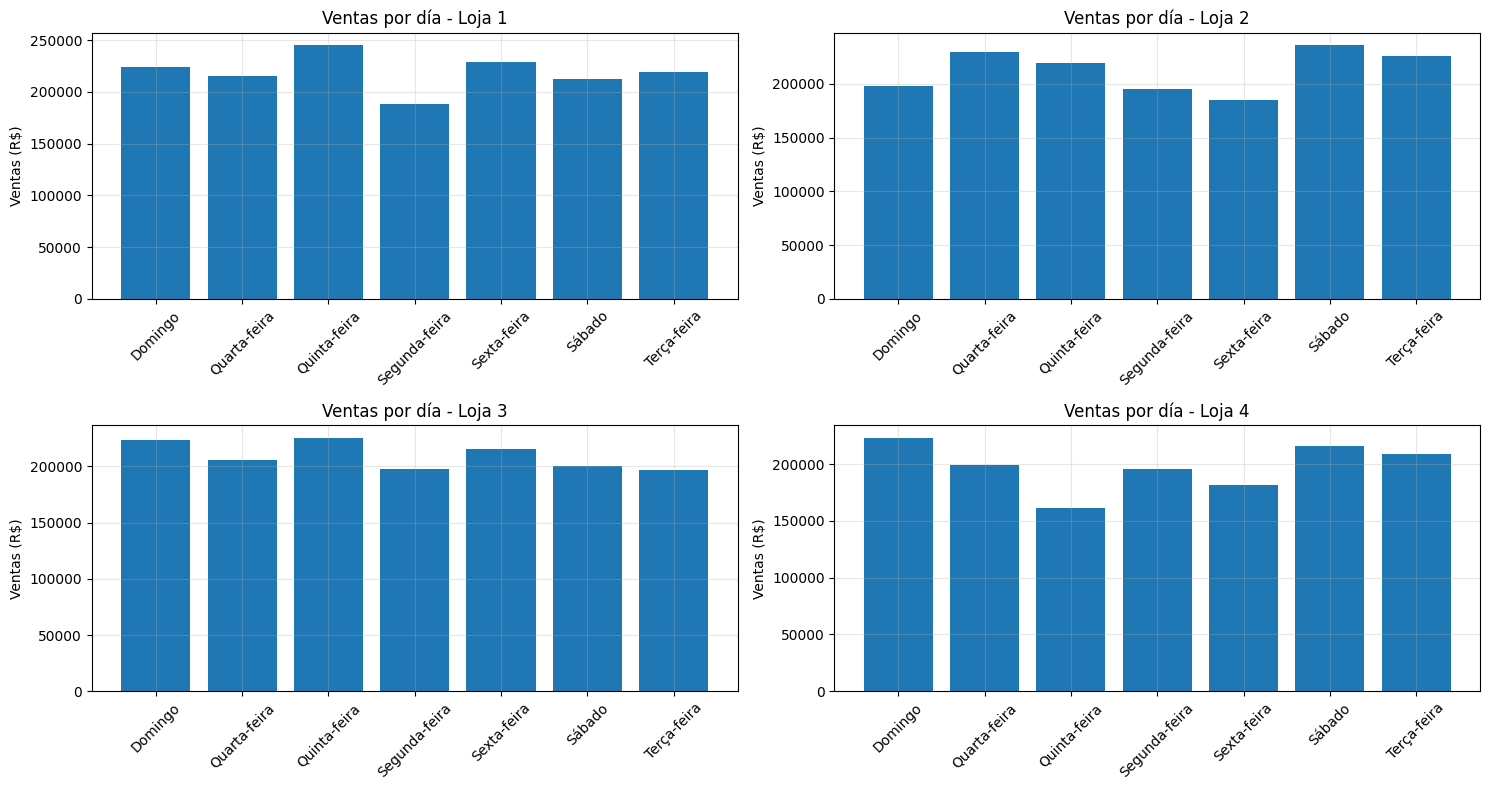


Distribución porcentual de ventas por día:

Loja 1:
Domingo: 14.61%
Quarta-feira: 14.03%
Quinta-feira: 15.96%
Segunda-feira: 12.3%
Sexta-feira: 14.93%
Sábado: 13.87%
Terça-feira: 14.3%

Loja 2:
Domingo: 13.29%
Quarta-feira: 15.41%
Quinta-feira: 14.77%
Segunda-feira: 13.11%
Sexta-feira: 12.43%
Sábado: 15.83%
Terça-feira: 15.16%

Loja 3:
Domingo: 15.26%
Quarta-feira: 14.03%
Quinta-feira: 15.38%
Segunda-feira: 13.49%
Sexta-feira: 14.72%
Sábado: 13.67%
Terça-feira: 13.45%

Loja 4:
Domingo: 16.1%
Quarta-feira: 14.4%
Quinta-feira: 11.65%
Segunda-feira: 14.1%
Sexta-feira: 13.08%
Sábado: 15.57%
Terça-feira: 15.09%
/tmp/ipykernel_78/1489207504.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventas_tienda['Porcentaje'] = (ventas_tienda['Preço'] / tot

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import locale
from datetime import datetime

# Primero necesitamos convertir la columna 'Data da Compra' a datetime si no lo está ya
todas_lojas['Data da Compra'] = pd.to_datetime(todas_lojas['Data da Compra'])

# Ahora creamos la columna del día de la semana (en inglés ya que pt_BR no está disponible)
todas_lojas['Dia_Semana_Nombre'] = todas_lojas['Data da Compra'].dt.day_name()

# Creamos un diccionario para traducir los días al portugués
dias_semana = {
    'Monday': 'Segunda-feira',
    'Tuesday': 'Terça-feira',
    'Wednesday': 'Quarta-feira',
    'Thursday': 'Quinta-feira',
    'Friday': 'Sexta-feira',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

# Traducimos los nombres de los días
todas_lojas['Dia_Semana_Nombre'] = todas_lojas['Dia_Semana_Nombre'].map(dias_semana)

# Agrupamos por tienda y día de la semana para obtener las ventas totales
ventas_dia_semana = todas_lojas.groupby(['Tienda', 'Dia_Semana_Nombre'])['Preço'].sum().reset_index()

# Encontramos el día con mayores ventas para cada tienda
mejor_dia = ventas_dia_semana.loc[ventas_dia_semana.groupby('Tienda')['Preço'].idxmax()]

# Mostramos los resultados
print("Día de la semana con mayores ventas por tienda:")
print("\nTienda | Día | Ventas (R$)")
print("-" * 40)
for _, row in mejor_dia.iterrows():
    print(f"{row['Tienda']} | {row['Dia_Semana_Nombre']} | R$ {row['Preço']:,.2f}")

# Visualización gráfica
plt.figure(figsize=(15, 8))

# Creamos un gráfico de barras para cada tienda
for i, tienda in enumerate(todas_lojas['Tienda'].unique()):
    datos_tienda = ventas_dia_semana[ventas_dia_semana['Tienda'] == tienda]
    
    plt.subplot(2, 2, i+1)
    plt.bar(datos_tienda['Dia_Semana_Nombre'], datos_tienda['Preço'])
    plt.title(f'Ventas por día - {tienda}')
    plt.xticks(rotation=45)
    plt.ylabel('Ventas (R$)')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculamos el porcentaje de ventas por día para cada tienda
print("\nDistribución porcentual de ventas por día:")
for tienda in todas_lojas['Tienda'].unique():
    ventas_tienda = ventas_dia_semana[ventas_dia_semana['Tienda'] == tienda]
    total_ventas = ventas_tienda['Preço'].sum()
    ventas_tienda['Porcentaje'] = (ventas_tienda['Preço'] / total_ventas * 100).round(2)
    
    print(f"\n{tienda}:")
    for _, row in ventas_tienda.iterrows():
        print(f"{row['Dia_Semana_Nombre']}: {row['Porcentaje']}%")

## Ventas según método de pago usado

Analizamos porque método prefieren los 

Análisis de ventas por tipo de pago y tiempo de crédito

Ventas por tipo de pago en cada tienda:
                                 sum  count
Tienda Tipo de pagamento                   
Loja 1 boleto              310147.09    483
       cartao_credito     1120887.66   1704
       cartao_debito        17999.05     35
       cupom                85475.32    137
Loja 2 boleto              280998.45    467
       cartao_credito     1088879.31   1721
       cartao_debito        15424.99     30
       cupom               103156.31    141
Loja 3 boleto              305762.67    468
       cartao_credito     1072760.47   1753
       cartao_debito        22286.70     37
       cupom                63215.19    101
Loja 4 boleto              277337.97    482
       cartao_credito     1024944.60   1720
       cartao_debito        19566.73     31
       cupom                62648.28    125

Porcentaje de ventas por tipo de pago:

Loja 1:
Tipo de pagamento
boleto            20.21
cartao_credito    73

<Figure size 1000x600 with 0 Axes>

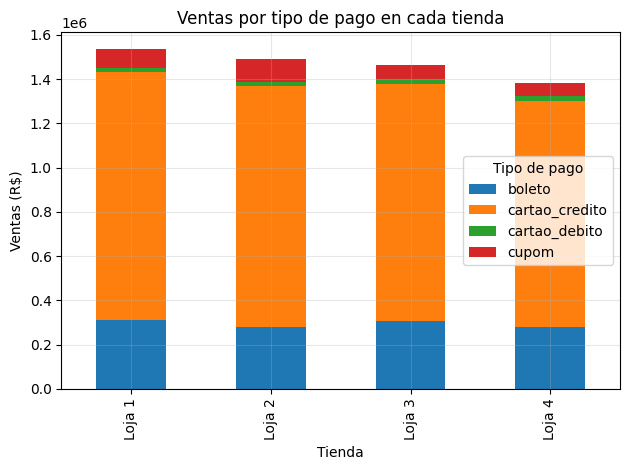


Columnas disponibles en el DataFrame:
['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra', 'Vendedor', 'Local da compra', 'Avaliação da compra', 'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon', 'Tienda', 'Mes', 'Dia_Semana', 'Dia_Semana_Nombre', 'Mes-Ano']

Distribución de tipos de pago:
Tipo de pagamento
cartao_credito    6898
boleto            1900
cupom              504
cartao_debito      133
Name: count, dtype: int64

Valor promedio de compra por tipo de pago:
Tipo de pagamento
boleto            618.02
cartao_credito    624.45
cartao_debito     566.00
cupom             624.00
Name: Preço, dtype: float64


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis de ventas por tipo de pago y tiempo de crédito
print("Análisis de ventas por tipo de pago y tiempo de crédito\n")

# Calcular el total de ventas por tipo de pago para cada tienda
ventas_tipo_pago = todas_lojas.groupby(['Tienda', 'Tipo de pagamento'])['Preço'].agg(['sum', 'count']).round(2)
print("Ventas por tipo de pago en cada tienda:")
print(ventas_tipo_pago)

# Calcular el porcentaje de ventas por tipo de pago
print("\nPorcentaje de ventas por tipo de pago:")
for tienda in todas_lojas['Tienda'].unique():
    datos_tienda = todas_lojas[todas_lojas['Tienda'] == tienda]
    total_ventas = datos_tienda['Preço'].sum()
    porcentajes = (datos_tienda.groupby('Tipo de pagamento')['Preço'].sum() / total_ventas * 100).round(2)
    print(f"\n{tienda}:")
    print(porcentajes)

# Verificar las columnas disponibles en el DataFrame
print("\nColumnas disponibles en el DataFrame:")
print(todas_lojas.columns)

# Análisis del tiempo de crédito (asumiendo que la columna se llama 'Tempo crédito' o similar)
# Primero verificamos si existe alguna columna relacionada con el tiempo de crédito
columnas_credito = [col for col in todas_lojas.columns if 'tempo' in col.lower() or 'crédit' in col.lower()]
print("\nColumnas relacionadas con crédito encontradas:")
print(columnas_credito)

if len(columnas_credito) > 0:
    # Si encontramos la columna de tiempo de crédito, realizamos el análisis
    nombre_columna_credito = columnas_credito[0]
    
    import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis de ventas por tipo de pago
print("Análisis de ventas por tipo de pago y tiempo de crédito\n")

# Calcular el total de ventas por tipo de pago para cada tienda
ventas_tipo_pago = todas_lojas.groupby(['Tienda', 'Tipo de pagamento'])['Preço'].agg(['sum', 'count']).round(2)
print("Ventas por tipo de pago en cada tienda:")
print(ventas_tipo_pago)

# Calcular el porcentaje de ventas por tipo de pago
print("\nPorcentaje de ventas por tipo de pago:")
for tienda in todas_lojas['Tienda'].unique():
    datos_tienda = todas_lojas[todas_lojas['Tienda'] == tienda]
    total_ventas = datos_tienda['Preço'].sum()
    porcentajes = (datos_tienda.groupby('Tipo de pagamento')['Preço'].sum() / total_ventas * 100).round(2)
    print(f"\n{tienda}:")
    print(porcentajes)

# Visualización de ventas por tipo de pago
plt.figure(figsize=(10, 6))
ventas_tipo = todas_lojas.groupby(['Tienda', 'Tipo de pagamento'])['Preço'].sum().unstack()
ventas_tipo.plot(kind='bar', stacked=True)
plt.title('Ventas por tipo de pago en cada tienda')
plt.xlabel('Tienda')
plt.ylabel('Ventas (R$)')
plt.legend(title='Tipo de pago')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Mostrar las columnas disponibles en el DataFrame
print("\nColumnas disponibles en el DataFrame:")
print(todas_lojas.columns.tolist())

# Análisis del tiempo de crédito (si la columna existe)
if 'tempo_credito' in todas_lojas.columns:  # Verificamos si existe la columna
    ventas_credito = todas_lojas[todas_lojas['Tipo de pagamento'] == 'credito']
    print("\nEstadísticas de tiempo de crédito por tienda:")
    tiempo_credito = ventas_credito.groupby('Tienda')['tempo_credito'].describe().round(2)
    print(tiempo_credito)

# Mostrar la distribución de tipos de pago
print("\nDistribución de tipos de pago:")
print(todas_lojas['Tipo de pagamento'].value_counts())

# Calcular el valor promedio de compra por tipo de pago
print("\nValor promedio de compra por tipo de pago:")
promedio_por_tipo = todas_lojas.groupby('Tipo de pagamento')['Preço'].mean().round(2)
print(promedio_por_tipo)

# 2. Vendas por Categoria


Análisis de ventas por categoría:

Resumen general:
                       Total_Ventas  Cantidad_Ventas  Porcentaje_Ventas
Categoria do Produto                                                   
eletronicos              2214099.72             1772              37.71
eletrodomesticos         1766337.03             1149              30.08
moveis                   1010214.00             1886              17.21
instrumentos musicais     465029.67              753               7.92
esporte e lazer           190635.39             1113               3.25
brinquedos                 98140.86             1290               1.67
utilidades domesticas      76773.38              730               1.31
livros                     50260.74              742               0.86


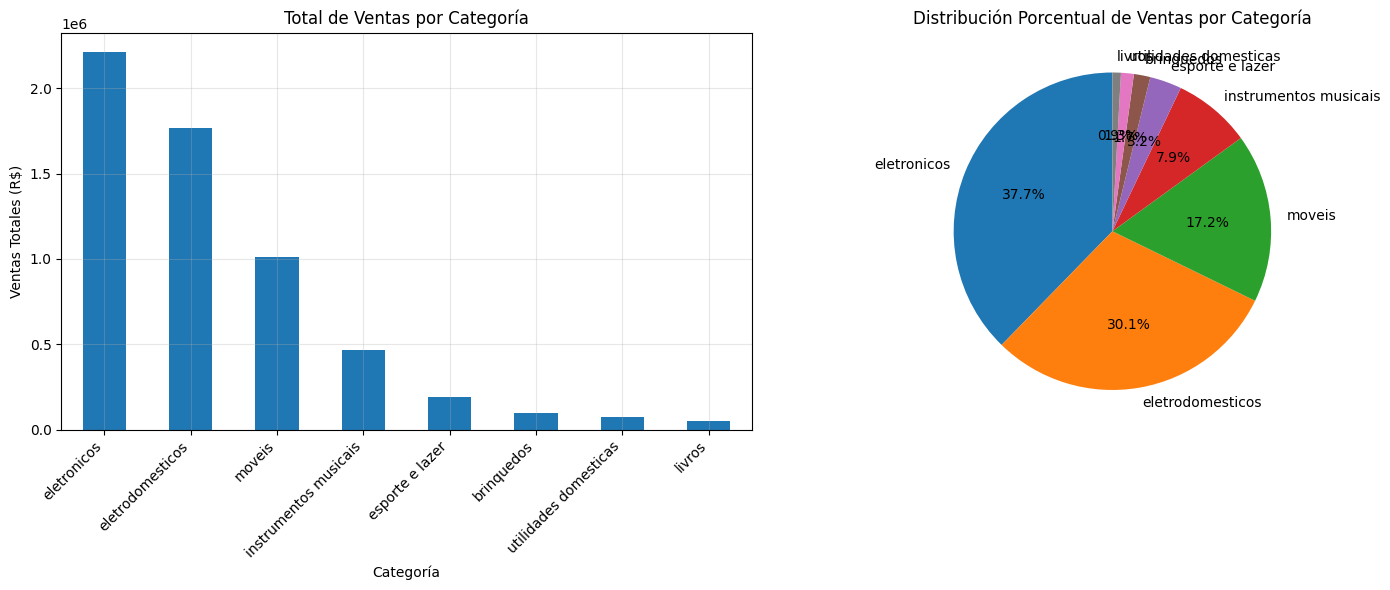


Análisis por tienda:

Ventas por categoría y tienda:
Tienda                    Loja 1     Loja 2     Loja 3     Loja 4
Categoria do Produto                                             
brinquedos              23993.78   21262.21   25869.20   27015.67
eletrodomesticos       484913.36  464758.13  438984.89  377680.65
eletronicos            572659.23  547773.71  547699.92  545966.86
esporte e lazer         52387.55   46326.09   47456.10   44465.65
instrumentos musicais  121731.69  139987.03  103174.45  100136.50
livros                  11713.92   13454.35   12664.70   12427.77
moveis                 250178.11  235234.68  268095.56  256705.65
utilidades domesticas   16931.48   19662.86   20080.21   20098.83


<Figure size 1500x800 with 0 Axes>

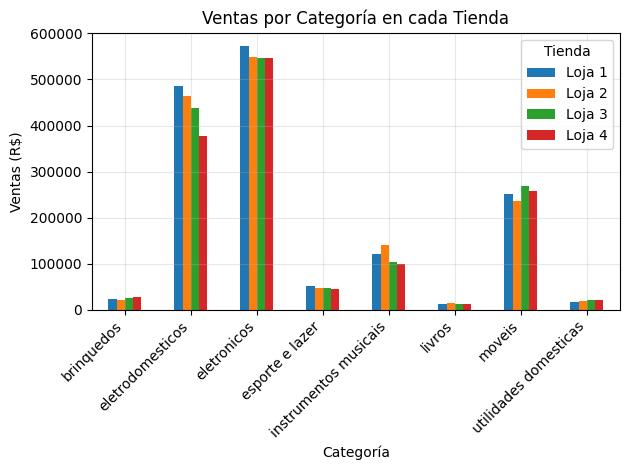

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar ventas por categoría
ventas_por_categoria = todas_lojas.groupby('Categoria do Produto')['Preço'].agg([
    ('Total_Ventas', 'sum'),
    ('Cantidad_Ventas', 'count')
]).round(2)

# Calcular el porcentaje de ventas
ventas_por_categoria['Porcentaje_Ventas'] = (ventas_por_categoria['Total_Ventas'] / ventas_por_categoria['Total_Ventas'].sum() * 100).round(2)

# Ordenar por total de ventas de mayor a menor
ventas_por_categoria = ventas_por_categoria.sort_values('Total_Ventas', ascending=False)

# Mostrar resultados
print("Análisis de ventas por categoría:")
print("\nResumen general:")
print(ventas_por_categoria)

# Crear visualización de barras para el total de ventas
plt.figure(figsize=(15, 6))

# Gráfico de barras para el total de ventas
plt.subplot(1, 2, 1)
ventas_por_categoria['Total_Ventas'].plot(kind='bar')
plt.title('Total de Ventas por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Ventas Totales (R$)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Gráfico de torta para el porcentaje de ventas
plt.subplot(1, 2, 2)
plt.pie(ventas_por_categoria['Porcentaje_Ventas'], 
        labels=ventas_por_categoria.index, 
        autopct='%1.1f%%',
        startangle=90)
plt.title('Distribución Porcentual de Ventas por Categoría')

plt.tight_layout()
plt.show()

# Análisis por tienda
print("\nAnálisis por tienda:")
ventas_categoria_tienda = todas_lojas.pivot_table(
    values='Preço',
    index='Categoria do Produto',
    columns='Tienda',
    aggfunc='sum'
).round(2)

print("\nVentas por categoría y tienda:")
print(ventas_categoria_tienda)

# Visualización de ventas por categoría para cada tienda
plt.figure(figsize=(15, 8))
ventas_categoria_tienda.plot(kind='bar')
plt.title('Ventas por Categoría en cada Tienda')
plt.xlabel('Categoría')
plt.ylabel('Ventas (R$)')
plt.legend(title='Tienda')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Productos mas vendidos por tienda en cada año

Productos menos vendidos por tienda:
    Tienda Categoria do Produto     Preço
5   Loja 1               livros  11713.92
13  Loja 2               livros  13454.35
21  Loja 3               livros  12664.70
29  Loja 4               livros  12427.77



Ventas mensuales de livros en Loja 1:
    Mes  Preço
2020-01 329.52
2020-02 310.82
2020-03 446.76
2020-04 574.06
2020-05 153.73
2020-06 212.65
2020-07 257.04
2020-08 388.71
2020-09 232.82
2020-10 116.96
2020-11 507.48
2020-12 309.49
2021-01 365.43
2021-02 307.78
2021-03 337.75
2021-04 278.34
2021-05 301.54
2021-06 256.88
2021-07 117.36
2021-08 383.96
2021-09 403.28
2021-10 113.78
2021-11 189.15
2021-12 371.88
2022-01 333.97
2022-02 327.17
2022-03 296.38
2022-04 338.23
2022-05 104.28
2022-06 246.49
2022-07 398.54
2022-08  75.80
2022-09 237.70
2022-10 263.68
2022-11 340.96
2022-12 224.78
2023-01 152.37
2023-02 228.79
2023-03 877.61

Ventas mensuales de livros en Loja 2:
    Mes  Preço
2020-01 241.27
2020-02 184.07
2020-03 478.84
2020-04 400.1

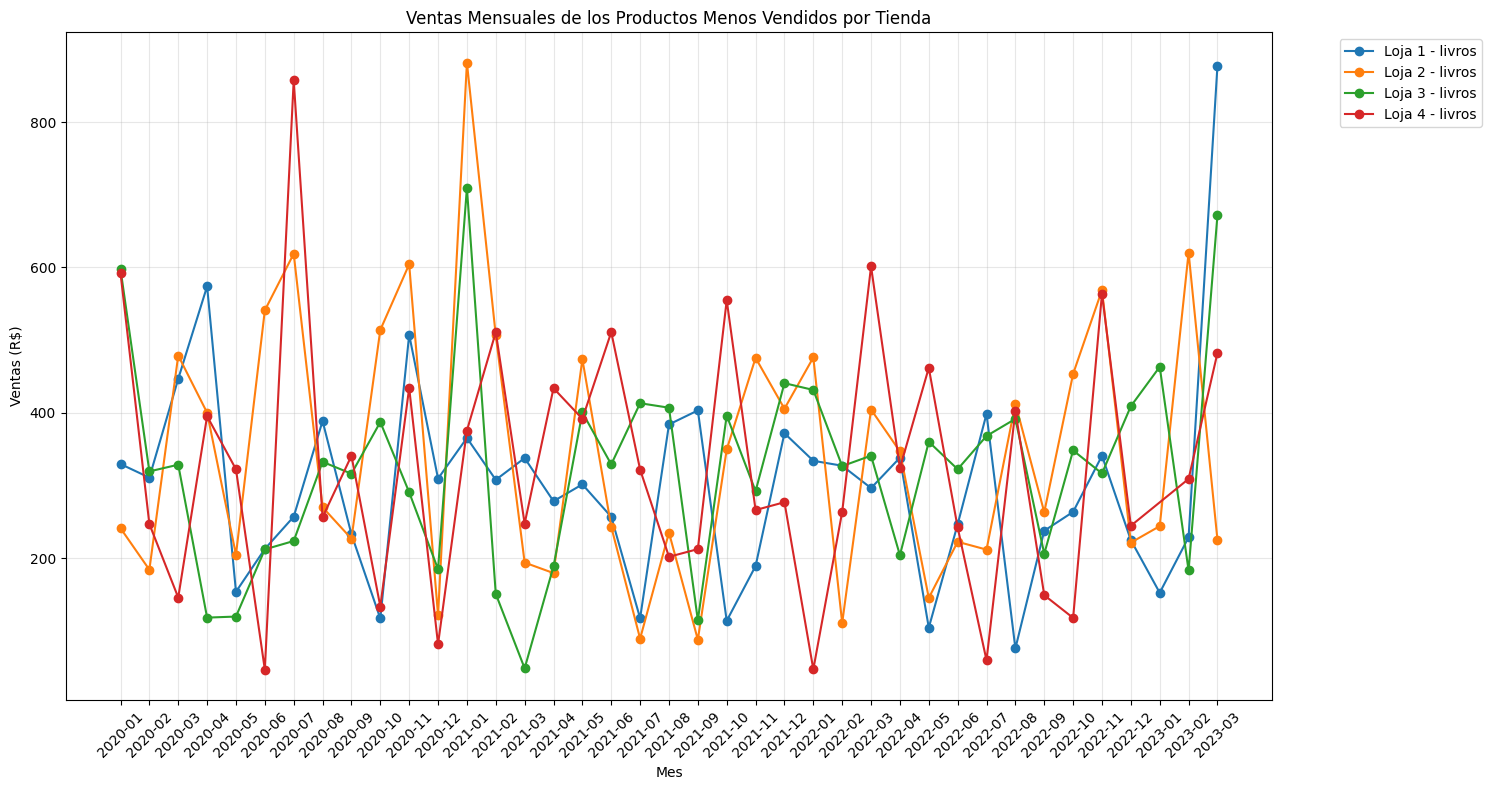


Meses con menos ventas para cada producto menos vendido:

Loja 1 - livros:
Mes con menos ventas: 2022-08
Monto de ventas: R$ 75.80

Loja 2 - livros:
Mes con menos ventas: 2021-09
Monto de ventas: R$ 87.81

Loja 3 - livros:
Mes con menos ventas: 2021-03
Monto de ventas: R$ 48.41

Loja 4 - livros:
Mes con menos ventas: 2020-06
Monto de ventas: R$ 46.58


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Primero identificamos los productos que menos se venden por tienda
ventas_producto_tienda = todas_lojas.groupby(['Tienda', 'Categoria do Produto'])['Preço'].sum().reset_index()
productos_menos_vendidos = ventas_producto_tienda.loc[ventas_producto_tienda.groupby('Tienda')['Preço'].idxmin()]

print("Productos menos vendidos por tienda:")
print(productos_menos_vendidos)
print("\n")

# Ahora analizamos las ventas mensuales de estos productos menos vendidos
todas_lojas['Mes'] = todas_lojas['Data da Compra'].dt.strftime('%Y-%m')

# Crear un DataFrame vacío para almacenar los resultados
ventas_mensuales = pd.DataFrame()

# Para cada tienda, analizamos su producto menos vendido
for _, row in productos_menos_vendidos.iterrows():
    tienda = row['Tienda']
    categoria = row['Categoria do Produto']
    
    # Filtrar datos para esta tienda y categoría
    datos_filtrados = todas_lojas[
        (todas_lojas['Tienda'] == tienda) & 
        (todas_lojas['Categoria do Produto'] == categoria)
    ]
    
    # Agrupar por mes
    ventas_mes = datos_filtrados.groupby('Mes')['Preço'].sum().reset_index()
    ventas_mes['Tienda'] = tienda
    ventas_mes['Categoria'] = categoria
    
    # Añadir al DataFrame de resultados
    ventas_mensuales = pd.concat([ventas_mensuales, ventas_mes])

# Mostrar resultados
for tienda in todas_lojas['Tienda'].unique():
    datos_tienda = ventas_mensuales[ventas_mensuales['Tienda'] == tienda]
    categoria = datos_tienda['Categoria'].iloc[0]
    
    print(f"\nVentas mensuales de {categoria} en {tienda}:")
    print(datos_tienda[['Mes', 'Preço']].to_string(index=False))

# Visualización
plt.figure(figsize=(15, 8))
for tienda in todas_lojas['Tienda'].unique():
    datos_tienda = ventas_mensuales[ventas_mensuales['Tienda'] == tienda]
    plt.plot(datos_tienda['Mes'], datos_tienda['Preço'], marker='o', label=f"{tienda} - {datos_tienda['Categoria'].iloc[0]}")

plt.title('Ventas Mensuales de los Productos Menos Vendidos por Tienda')
plt.xlabel('Mes')
plt.ylabel('Ventas (R$)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Identificar los meses con menos ventas para cada producto menos vendido
print("\nMeses con menos ventas para cada producto menos vendido:")
for tienda in todas_lojas['Tienda'].unique():
    datos_tienda = ventas_mensuales[ventas_mensuales['Tienda'] == tienda]
    mes_menor_venta = datos_tienda.loc[datos_tienda['Preço'].idxmin()]
    print(f"\n{tienda} - {mes_menor_venta['Categoria']}:")
    print(f"Mes con menos ventas: {mes_menor_venta['Mes']}")
    print(f"Monto de ventas: R$ {mes_menor_venta['Preço']:.2f}")

# Venta de cada tienda por año
identificar los meses con menos ventas para cada tienda

Mes con menos ventas por año y tienda:

Loja 1
------------------------------
Año 2020: Noviembre - R$ 26,492.66
Año 2021: Abril - R$ 30,182.93
Año 2022: Octubre - R$ 19,576.04
Año 2023: Enero - R$ 38,573.59

Loja 2
------------------------------
Año 2020: Febrero - R$ 23,184.97
Año 2021: Junio - R$ 30,432.75
Año 2022: Febrero - R$ 31,138.05
Año 2023: Enero - R$ 33,534.07

Loja 3
------------------------------
Año 2020: Junio - R$ 23,285.27
Año 2021: Septiembre - R$ 18,818.06
Año 2022: Marzo - R$ 31,856.46
Año 2023: Febrero - R$ 23,670.30

Loja 4
------------------------------
Año 2020: Octubre - R$ 23,596.86
Año 2021: Junio - R$ 22,543.46
Año 2022: Julio - R$ 19,827.46
Año 2023: Marzo - R$ 24,044.26


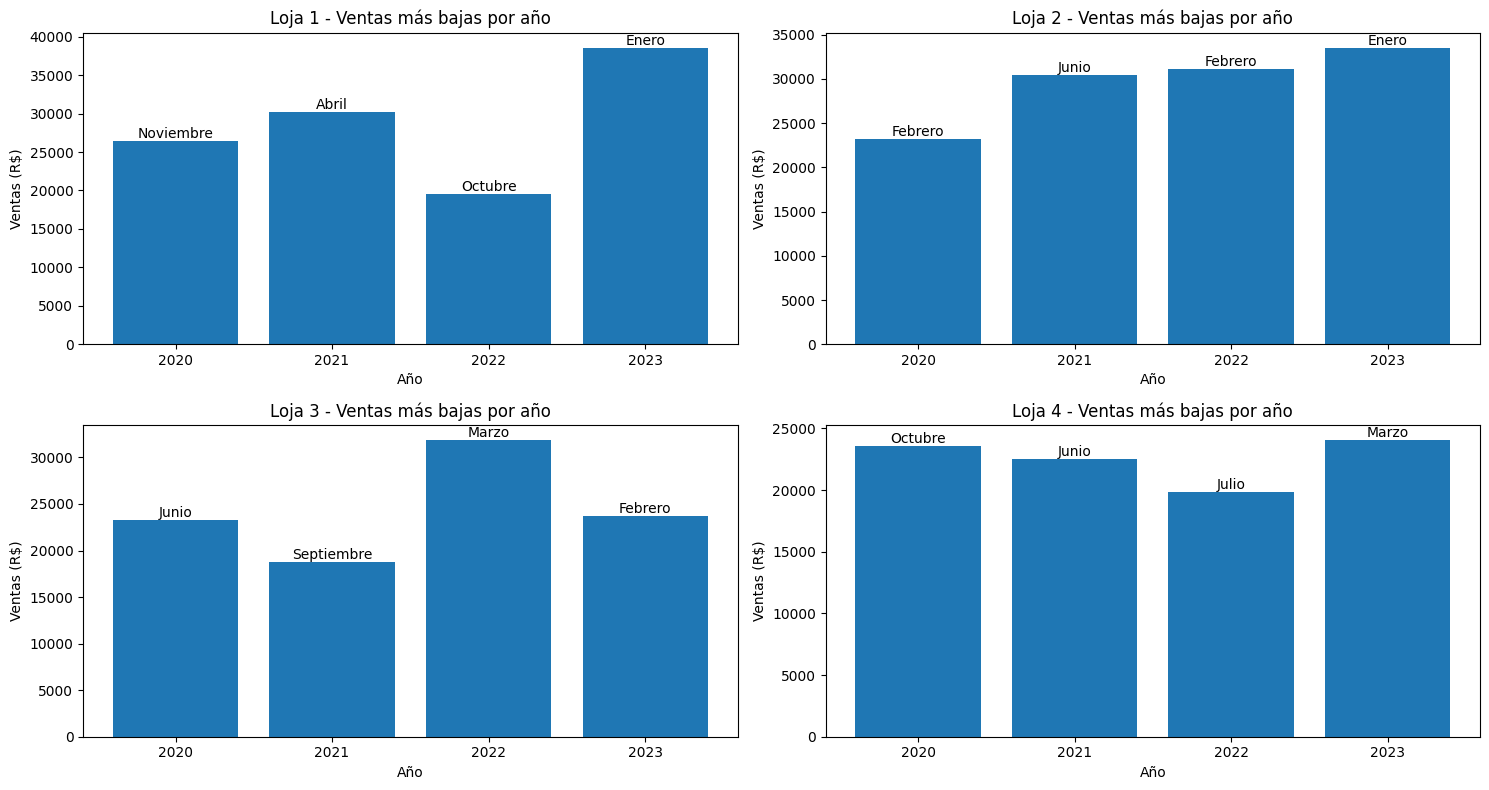


Estadísticas adicionales:

Loja 1
Promedio de ventas en los meses más bajos: R$ 28,706.31
Mes con la venta más baja absoluta: 2022-10
Valor más bajo: R$ 19,576.04

Loja 2
Promedio de ventas en los meses más bajos: R$ 29,572.46
Mes con la venta más baja absoluta: 2020-02
Valor más bajo: R$ 23,184.97

Loja 3
Promedio de ventas en los meses más bajos: R$ 24,407.52
Mes con la venta más baja absoluta: 2021-09
Valor más bajo: R$ 18,818.06

Loja 4
Promedio de ventas en los meses más bajos: R$ 22,503.01
Mes con la venta más baja absoluta: 2022-07
Valor más bajo: R$ 19,827.46


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertimos la fecha a datetime si no lo está ya
todas_lojas['Data da Compra'] = pd.to_datetime(todas_lojas['Data da Compra'])

# Creamos columnas de año y mes
todas_lojas['Ano'] = todas_lojas['Data da Compra'].dt.year
todas_lojas['Mes'] = todas_lojas['Data da Compra'].dt.month
todas_lojas['Mes-Ano'] = todas_lojas['Data da Compra'].dt.strftime('%Y-%m')

# Agrupamos por tienda, año y mes para obtener las ventas totales
ventas_mensuales = todas_lojas.groupby(['Tienda', 'Ano', 'Mes', 'Mes-Ano'])['Preço'].sum().reset_index()

# Para cada tienda y año, encontramos el mes con menos ventas
meses_menos_ventas = ventas_mensuales.loc[ventas_mensuales.groupby(['Tienda', 'Ano'])['Preço'].idxmin()]

# Ordenamos los resultados
meses_menos_ventas = meses_menos_ventas.sort_values(['Tienda', 'Ano'])

# Creamos un diccionario para mapear números de mes a nombres
meses = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}
meses_menos_ventas['Nombre_Mes'] = meses_menos_ventas['Mes'].map(meses)

# Mostramos los resultados
print("Mes con menos ventas por año y tienda:")
print("=" * 60)
for tienda in meses_menos_ventas['Tienda'].unique():
    print(f"\n{tienda}")
    print("-" * 30)
    datos_tienda = meses_menos_ventas[meses_menos_ventas['Tienda'] == tienda]
    for _, row in datos_tienda.iterrows():
        print(f"Año {row['Ano']}: {row['Nombre_Mes']} - R$ {row['Preço']:,.2f}")

# Visualización gráfica
plt.figure(figsize=(15, 8))

for i, tienda in enumerate(meses_menos_ventas['Tienda'].unique(), 1):
    plt.subplot(2, 2, i)
    datos_tienda = meses_menos_ventas[meses_menos_ventas['Tienda'] == tienda]
    
    plt.bar(datos_tienda['Ano'].astype(str), datos_tienda['Preço'])
    plt.title(f'{tienda} - Ventas más bajas por año')
    plt.xlabel('Año')
    plt.ylabel('Ventas (R$)')
    
    # Añadimos etiquetas con el mes
    for x, y, mes in zip(range(len(datos_tienda)), datos_tienda['Preço'], datos_tienda['Nombre_Mes']):
        plt.text(x, y, mes, ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Calculamos estadísticas adicionales
print("\nEstadísticas adicionales:")
print("=" * 60)
for tienda in meses_menos_ventas['Tienda'].unique():
    datos_tienda = meses_menos_ventas[meses_menos_ventas['Tienda'] == tienda]
    promedio = datos_tienda['Preço'].mean()
    print(f"\n{tienda}")
    print(f"Promedio de ventas en los meses más bajos: R$ {promedio:,.2f}")
    print(f"Mes con la venta más baja absoluta: {datos_tienda.loc[datos_tienda['Preço'].idxmin(), 'Mes-Ano']}")
    print(f"Valor más bajo: R$ {datos_tienda['Preço'].min():,.2f}")

# Ventas mensuales de los Productos Menos Vendidos en las Tienda 3 en cada año regisrado


Resumen de ventas de Loja 3:

Detalle:
Tienda Mes con venta más baja Valor más bajo Promedio ventas meses
Loja 3                2021-09   R$ 18,818.06          R$ 37,539.10
/tmp/ipykernel_78/3580121561.py:14: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  loja3['Data da Compra'] = pd.to_datetime(loja3['Data da Compra'])


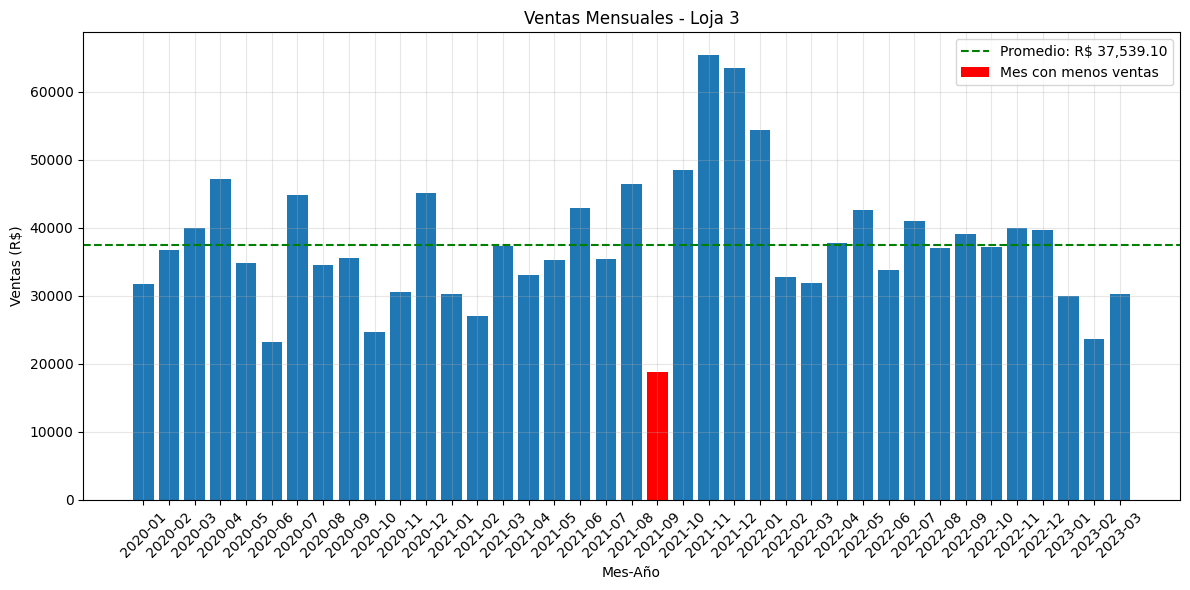


Estadísticas adicionales:
Total de ventas: R$ 1,464,025.03
Venta mensual máxima: R$ 65,442.45
Venta mensual mínima: R$ 18,818.06
Promedio de ventas mensuales: R$ 37,539.10


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Primero cargamos los datos de las tiendas
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"

# Cargamos los datos de la tienda 3
loja3 = pd.read_csv(url3)

# Agregamos identificador de tienda
loja3['Tienda'] = 'Loja 3'

# Convertimos la fecha a datetime
loja3['Data da Compra'] = pd.to_datetime(loja3['Data da Compra'])
loja3['Mes-Ano'] = loja3['Data da Compra'].dt.strftime('%Y-%m')

# Agrupamos por mes para obtener las ventas mensuales
ventas_mensuales = loja3.groupby('Mes-Ano')['Preço'].sum().reset_index()

# Encontramos el mes con menos ventas
mes_menos_ventas = ventas_mensuales.loc[ventas_mensuales['Preço'].idxmin()]

# Crear resumen
datos_resumen = [{
    'Tienda': 'Loja 3',
    'Mes con venta más baja': mes_menos_ventas['Mes-Ano'],
    'Valor más bajo': mes_menos_ventas['Preço'],
    'Promedio ventas meses': ventas_mensuales['Preço'].mean()
}]

# Crear DataFrame con el resumen
df_resumen = pd.DataFrame(datos_resumen)

# Formatear las columnas numéricas
df_resumen['Valor más bajo'] = df_resumen['Valor más bajo'].map('R$ {:,.2f}'.format)
df_resumen['Promedio ventas meses'] = df_resumen['Promedio ventas meses'].map('R$ {:,.2f}'.format)

# Mostrar el DataFrame con formato
print("\nResumen de ventas de Loja 3:")
print("=" * 100)
print("\nDetalle:")
print(df_resumen.to_string(index=False))

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(ventas_mensuales['Mes-Ano'], ventas_mensuales['Preço'])
plt.title('Ventas Mensuales - Loja 3')
plt.xlabel('Mes-Año')
plt.ylabel('Ventas (R$)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Resaltar el mes con menos ventas
min_venta = ventas_mensuales['Preço'].min()
mes_min = ventas_mensuales.loc[ventas_mensuales['Preço'] == min_venta, 'Mes-Ano'].iloc[0]
plt.bar(mes_min, min_venta, color='red', label='Mes con menos ventas')

# Agregar una línea para el promedio
promedio = ventas_mensuales['Preço'].mean()
plt.axhline(y=promedio, color='green', linestyle='--', label=f'Promedio: R$ {promedio:,.2f}')

plt.legend()
plt.tight_layout()
plt.show()

# Mostrar estadísticas adicionales
print("\nEstadísticas adicionales:")
print("=" * 50)
print(f"Total de ventas: R$ {ventas_mensuales['Preço'].sum():,.2f}")
print(f"Venta mensual máxima: R$ {ventas_mensuales['Preço'].max():,.2f}")
print(f"Venta mensual mínima: R$ {ventas_mensuales['Preço'].min():,.2f}")
print(f"Promedio de ventas mensuales: R$ {ventas_mensuales['Preço'].mean():,.2f}")

## Categorías mas vendidas por tienda 

# 3. Média de Avaliação das Lojas

## Calculando la valoración media de cada tienda 

## Analizando  las ventas de la tienda con menor valoración

# 4. Produtos Mais e Menos Vendidos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Análisis de productos más vendidos por tienda
def mostrar_productos_mas_vendidos(df, tienda, n=5):
    productos_tienda = df[df['Tienda'] == tienda]
    productos_mas_vendidos = productos_tienda.groupby('Produto')['Preço'].agg([
        ('Total_Ventas', 'sum'),
        ('Cantidad_Ventas', 'count')
    ]).sort_values('Cantidad_Ventas', ascending=False).head(n)
    
    return productos_mas_vendidos

# Mostrar los 5 productos más vendidos para cada tienda
for tienda in todas_lojas['Tienda'].unique():
    print(f"\nProductos más vendidos en {tienda}:")
    print(mostrar_productos_mas_vendidos(todas_lojas, tienda))

# Visualización gráfica de los productos más vendidos por tienda
plt.figure(figsize=(20, 15))

for i, tienda in enumerate(todas_lojas['Tienda'].unique(), 1):
    plt.subplot(2, 2, i)
    
    productos_tienda = todas_lojas[todas_lojas['Tienda'] == tienda]
    top_productos = productos_tienda.groupby('Produto')['Preço'].count().sort_values(ascending=False).head(5)
    
    top_productos.plot(kind='bar')
    plt.title(f'Top 5 Productos Más Vendidos - {tienda}')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad de Ventas')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis adicional: Productos más vendidos en general
print("\nTop 10 productos más vendidos en todas las tiendas:")
productos_total = todas_lojas.groupby('Produto').agg({
    'Preço': ['count', 'sum']
}).round(2)

productos_total.columns = ['Cantidad_Ventas', 'Total_Ventas']
productos_total = productos_total.sort_values('Cantidad_Ventas', ascending=False).head(10)
print(productos_total)

# Visualización del top 10 general
plt.figure(figsize=(12, 6))
productos_total['Cantidad_Ventas'].plot(kind='bar')
plt.title('Top 10 Productos Más Vendidos - Todas las Tiendas')
plt.xlabel('Producto')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

NameError: name 'todas_lojas' is not defined

## Productos menos vendidos en las tiendas


Productos menos vendidos en Loja 1:
                   Total_Ventas  Cantidad_Ventas
Produto                                         
Headset                 6307.71               33
Celular ABXY           43534.47               33
Panela de pressão       3505.71               35
Pandeiro                2985.19               36
Mochila                 5156.50               39

Productos menos vendidos en Loja 2:
                   Total_Ventas  Cantidad_Ventas
Produto                                         
Jogo de tabuleiro       7749.58               32
Impressora             13846.69               34
Mesa de jantar         11516.31               34
Poltrona               11218.00               35
Fone de ouvido          4759.28               37

Productos menos vendidos en Loja 3:
                  Total_Ventas  Cantidad_Ventas
Produto                                        
Blocos de montar       1649.81               35
Mochila                4729.54               36
Micro-ondas

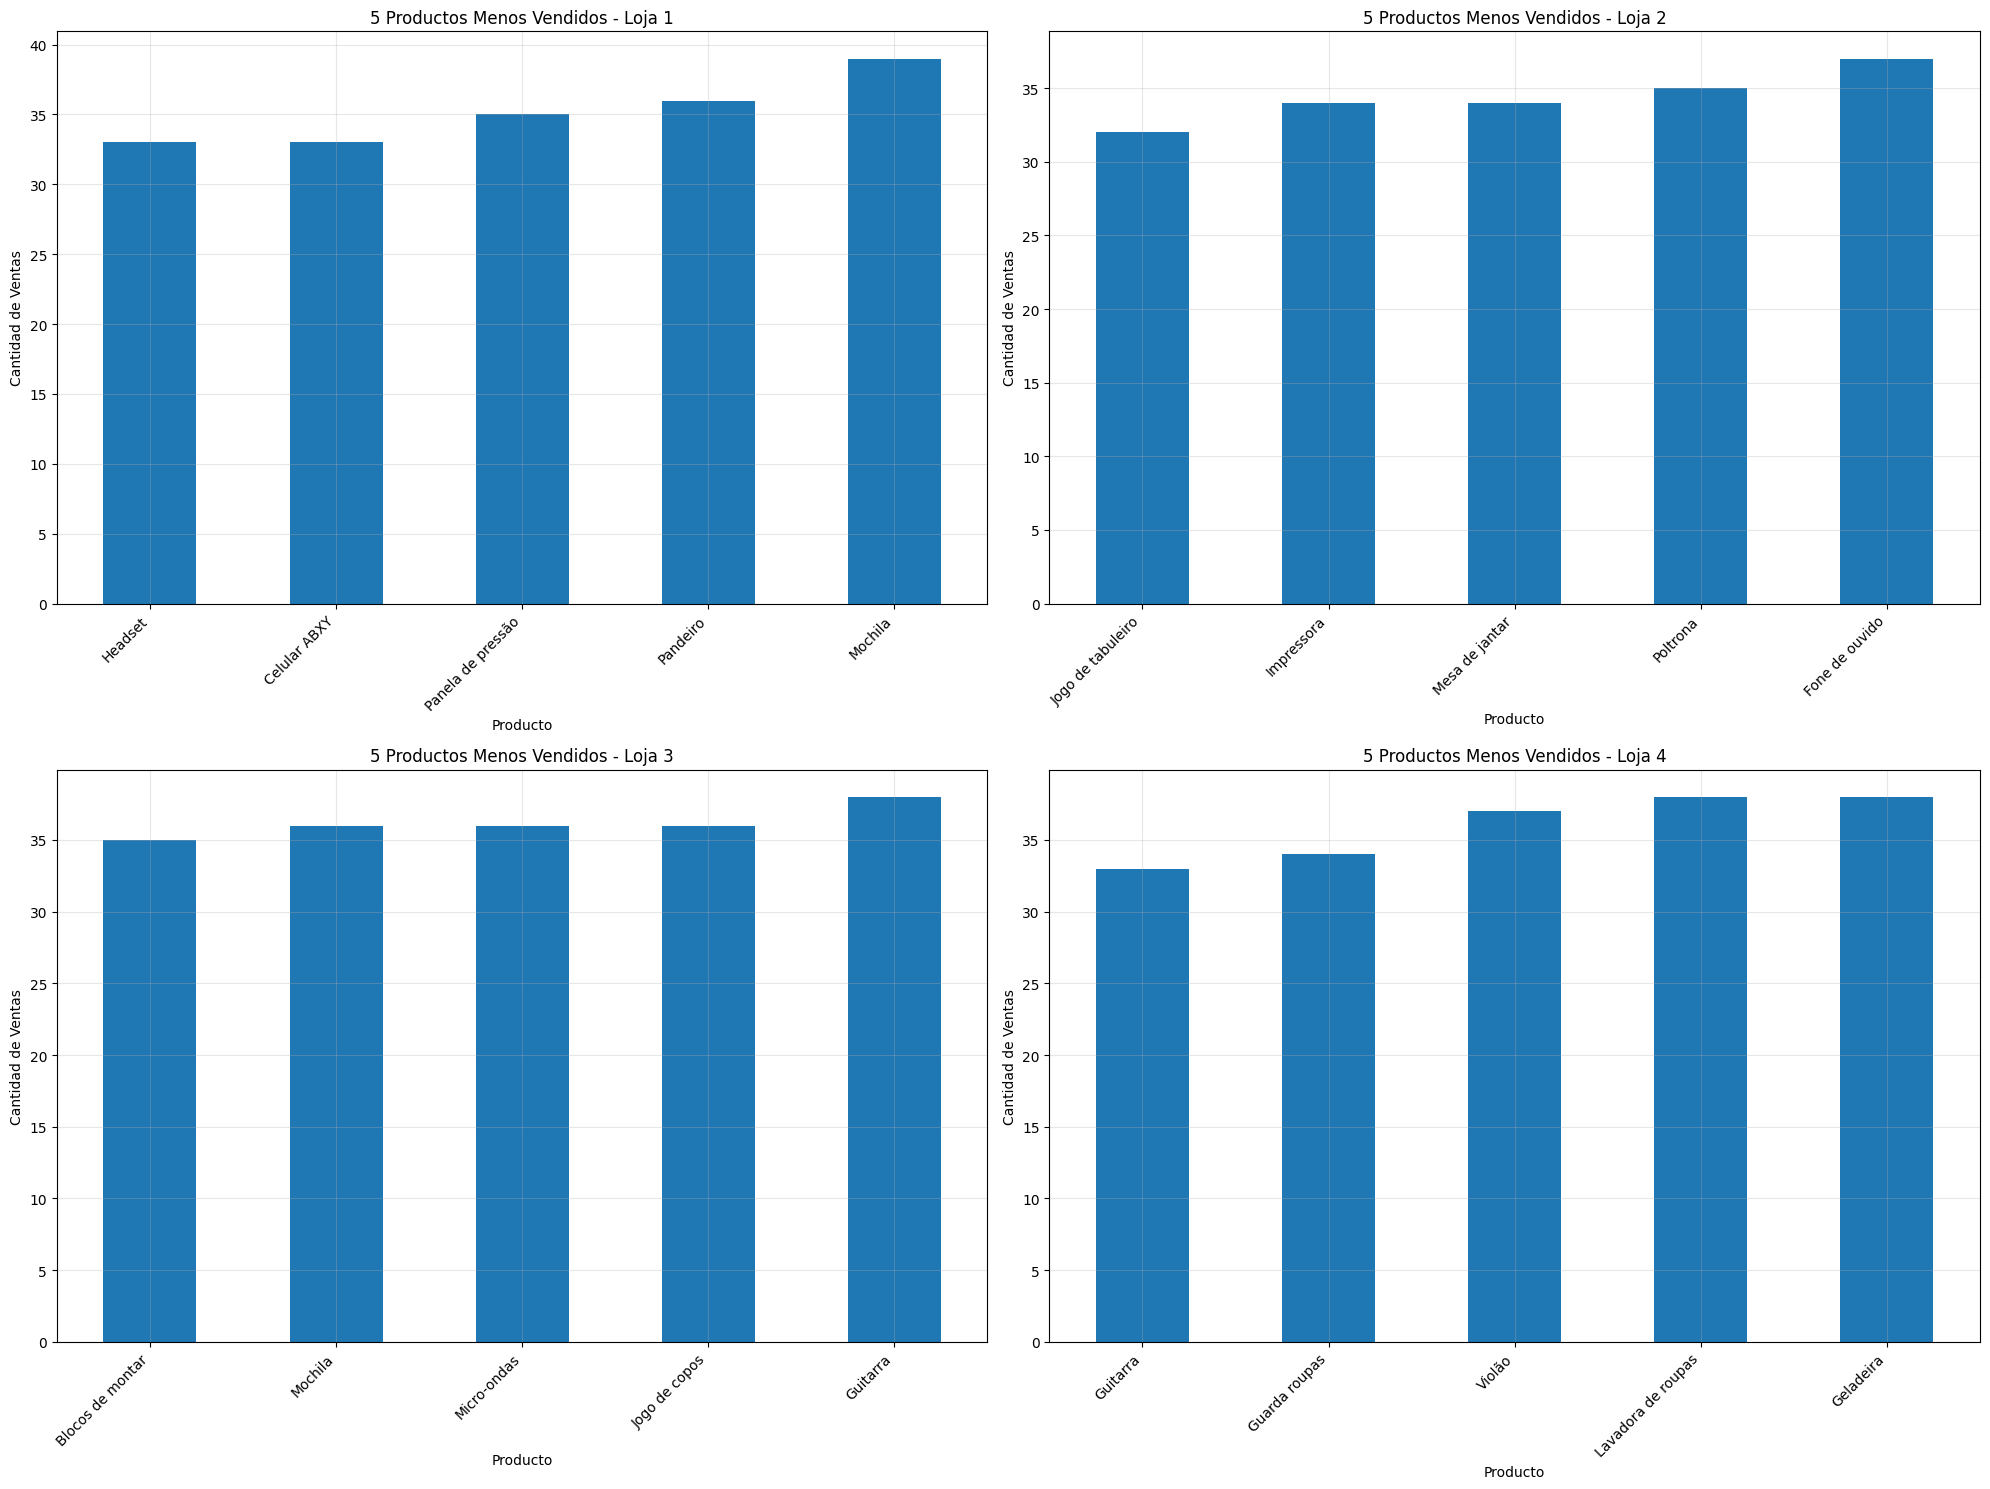


Los 10 productos menos vendidos en todas las tiendas:
                             Cantidad_Ventas  Total_Ventas
Produto                                                   
Celular ABXY                             157     210547.77
Headset                                  158      30330.90
Mochila                                  163      21421.54
Guitarra                                 165     172539.87
Ciência de dados com python              166      12049.06
Assistente virtual                       167      45956.59
Poltrona                                 168      54395.35
Jogo de copos                            169       7445.28
Smartwatch                               172      39905.90
Panela de pressão                        172      17238.91


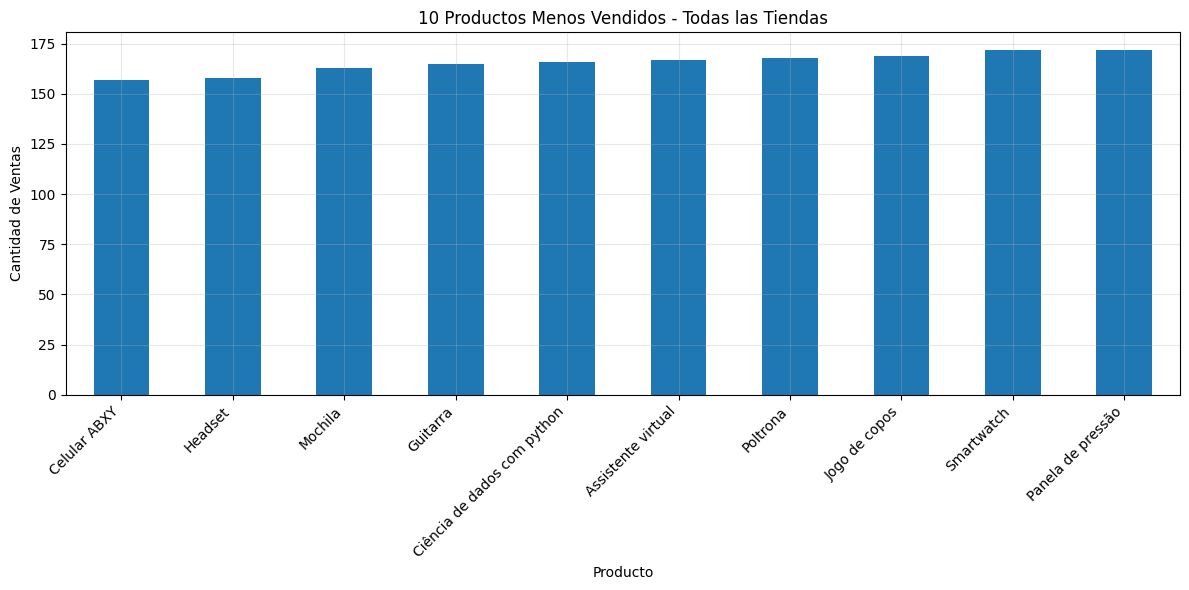


Estadísticas generales de ventas por producto:

Productos con estadísticas más bajas:
                             Cantidad_Ventas  Total_Ventas  Precio_Promedio
Produto                                                                    
Celular ABXY                             157     210547.77          1341.07
Headset                                  158      30330.90           191.97
Mochila                                  163      21421.54           131.42
Guitarra                                 165     172539.87          1045.70
Ciência de dados com python              166      12049.06            72.58


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Análisis de productos menos vendidos por tienda
def mostrar_productos_menos_vendidos(df, tienda, n=5):
    productos_tienda = df[df['Tienda'] == tienda]
    productos_menos_vendidos = productos_tienda.groupby('Produto')['Preço'].agg([
        ('Total_Ventas', 'sum'),
        ('Cantidad_Ventas', 'count')
    ]).sort_values('Cantidad_Ventas', ascending=True).head(n)
    
    return productos_menos_vendidos

# Mostrar los 5 productos menos vendidos para cada tienda
for tienda in todas_lojas['Tienda'].unique():
    print(f"\nProductos menos vendidos en {tienda}:")
    print(mostrar_productos_menos_vendidos(todas_lojas, tienda))

# Visualización gráfica de los productos menos vendidos por tienda
plt.figure(figsize=(20, 15))

for i, tienda in enumerate(todas_lojas['Tienda'].unique(), 1):
    plt.subplot(2, 2, i)
    
    productos_tienda = todas_lojas[todas_lojas['Tienda'] == tienda]
    bottom_productos = productos_tienda.groupby('Produto')['Preço'].count().sort_values(ascending=True).head(5)
    
    bottom_productos.plot(kind='bar')
    plt.title(f'5 Productos Menos Vendidos - {tienda}')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad de Ventas')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análisis adicional: Productos menos vendidos en general
print("\nLos 10 productos menos vendidos en todas las tiendas:")
productos_total_menos = todas_lojas.groupby('Produto').agg({
    'Preço': ['count', 'sum']
}).round(2)

productos_total_menos.columns = ['Cantidad_Ventas', 'Total_Ventas']
productos_total_menos = productos_total_menos.sort_values('Cantidad_Ventas', ascending=True).head(10)
print(productos_total_menos)

# Visualización del bottom 10 general
plt.figure(figsize=(12, 6))
productos_total_menos['Cantidad_Ventas'].plot(kind='bar')
plt.title('10 Productos Menos Vendidos - Todas las Tiendas')
plt.xlabel('Producto')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Análisis adicional: Estadísticas de ventas
print("\nEstadísticas generales de ventas por producto:")
estadisticas_ventas = todas_lojas.groupby('Produto')['Preço'].agg([
    ('Cantidad_Ventas', 'count'),
    ('Total_Ventas', 'sum'),
    ('Precio_Promedio', 'mean')
]).round(2)

print("\nProductos con estadísticas más bajas:")
print(estadisticas_ventas.sort_values('Cantidad_Ventas', ascending=True).head())

# 5. Frete Médio por Loja
